## Load Data

In [14]:
using RDatasets
using Plots
using Random
using Statistics
include("utils.jl")


Random.seed!(1234)

iris = dataset("datasets", "iris")
X = Matrix(iris[:, 1:4])
y = iris.Species

X_train, y_train, X_test, y_test, classes = prepare_data(X', y; dims=2)


## FLUX

In [12]:
using RDatasets
using Flux
using Flux: crossentropy

n_hidden = 2
# model initialization
m = Chain(
    Dense(size(X_train, 1), n_hidden, relu),
    Dense(n_hidden, size(y_train, 1), identity),
    softmax,
)

# used function
L(x, y) = crossentropy(m(x), y)
onecold(y, classes) = [classes[argmax(y_col)] for y_col in eachcol(y)]
accuracy(x, y) = mean(onecold(m(x), classes) .== onecold(y, classes))

# preperation
opt = Descent(0.1)  # Optimalizer
epochs = 200 # Epochs
ps = Flux.params(m)
acc_test = zeros(epochs)
Loss_history = similar(acc_test)

# training 
for i in 1:epochs
    Loss = L(X_train, y_train)
    Loss_history[i] = Loss
    gs = gradient(() -> L(X_train, y_train), ps)
    Flux.Optimise.update!(opt, ps, gs)
    acc_test[i] = accuracy(X_test, y_test)
end

nothing # hide

### Flux results

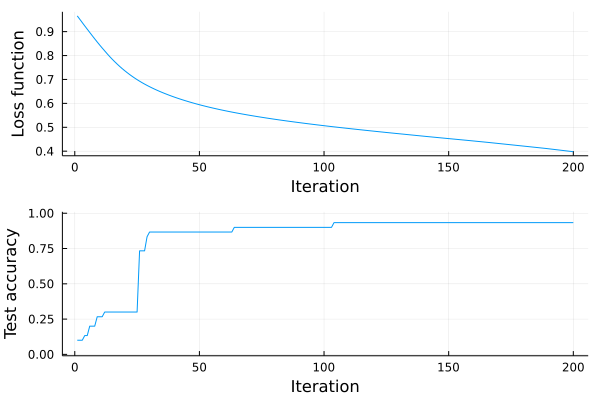

In [13]:
p1 = plot(Loss_hisotry, xlabel="Iteration", ylabel="Loss function", label="")
p2 = plot(acc_test, xlabel="Iteration", ylabel="Test accuracy", label="", ylim=(-0.01, 1.01))
plot(p1,p2, layout = (2,1))
